# CHAP2 사이킷런으로 시작하는 머신러닝

### 붓꽃 데이터 세트로 붓꽃의 품종 분류하기
분류 : 지도학습(Supervised Learning) 방법 중 하나<br>
지도학습 : 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답 예측하는 방식

In [2]:
# 사이킷런에서 사용할 모듈 임포트
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈 모임<br>
sklearn.tree : 트리 기반 ML 알고리즘 구현한 클래스 모임<br>
sklearn.model_selection : 학습데이터, 검증 데이터, 예측 데이터로 데이터 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 모듈 모임<br>

In [2]:
import pandas as pd

In [3]:
# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data : Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target : 붓꽃 데이터 세트에서 레이블 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


label에서    
0 : Setosa 품종    
1 : versicolor 품종    
2 : virginica 품종

In [4]:
# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

첫 번재 파라미터 : feature 데이터 세트    
두 번째 파라미터 : 레이블 데이터 세트    
test_size : 전체 데이터 세트 중 테스트 데이터 세트 비율    
random_state : 호출할 때마다 같은 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

In [6]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [7]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 함 (일반적으로 테스트 데이터 세트 이용)

In [8]:
# 성능 평가 - 정확도
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9333


정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표

### Estimator 이해 및 fit(), predict() 메서드

fit() - 모델 학습, predict() - 학습된 모델 예측    
Classifier(분류) + Regressor(회귀) = Estimator 클래스    

비지도학습(차원 축소, 클러스터링, feature 추출 등)에도 fit(), transform() 적용    
비지도학습에서 fit() : 입력 데이터의 형태에 맞춰 데이터를 변환하기 위핸 사전구조를 맞추는 작업    
tranform() : fit()으로 변환을 위한 사전 구조 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, feature 추출 등의 실제 작업 수행    

fit + tranform = fit_tranform()    

### 내장된 예제 데이터 세트
* 분류나 회귀 연습용 예제 데이터    

| API | 설명 |
|:-----|:------|
|datasets.load_boston()|회귀, 미국 보스턴의 집 feature들과 가격에 대한 데이터|
|datasets.load_breast_cancer()|분류, 위스콘신 유방암 feature과 악성/음성 레이블 데이터|
|datasets.load_diabetes()|회귀, 당뇨 데이터|
|datasets.load_digits()|분류, 0~9 숫자의 이미지 픽셀 데이터|
|datasets.load_iris()|분류, 붓꽃에 대한 feature을 가진 데이터|

* fetch 계열의 명령<br>
: 데이터 크기가 커서 인터넷에서 내려받아 scikit_learn_data라는 서브 디렉터리 저장 후 불러들이는 데이터, 인터넷 연결 필수    

fetch_covtype() : 회귀 분석용 토지 조사 자료<br>
fetch_20newsgroups() : 뉴스 그룹 텍스트 자료<br>
fetch_olivetti_faces() : 얼굴 이미지 자료<br>
fetch_lfw_people() : 얼굴 이미지 자료<br>
fetch_lfw_pairs() : 얼굴 이미지 자료<br>
fetch_rcv1 : 로이터 뉴스 말뭉치<br>
fetch_mldata() : ML 웹사이트에서 다운로드

* 분류와 클러스터링을 위한 표본 데이터 생성기   

| API | 설명 |
|:-----|:------|
|datasets.make_classifications()|분류를 위한 데이터 세트 생성, 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터 무작위 생성|
|datasets.make_blobs()|클러스터링을 위한 데이터 세트 생성, 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트 쉽게 생성|

사이킷런에 내장된 데이터세트는 일반적으로 **딕셔너리** 형태
개별 키가 가리키는 데이터 세트의 의미
* data : feature의 데이터 세트, ndarray
* target : 분류 시, 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트, ndarray
* target_names : 개별 레이블의 이름, numpy 배열 or list
* feature_names : feature의 이름, numpy 배열 or list
* DESCR : 데이터 세트에 대한 설명, 각 feature의 설명, string

feature의 데이터 값을 반환받기 위해서는 API 호출한 뒤에 그 Key값 지정

In [9]:
# API 반환 결과 확인
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


load_iris() API의 반환 결과는 sklearn.utils.Bunch 클래스

In [10]:
# key 값 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print('feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\ntarget_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\ndata의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data.data)

print('\ntarget의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)

feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

### 학습/테스트 데이터 세트 분리 - train_test_split()
train_test_split() 파라미터
* test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가, 디폴트 0.25
* train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가, 잘 사용X
* shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 디폴트 True, 데이터 분산시켜 더 효율적인 학습 및 테스트 데이터 세트 생성
* random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값

In [8]:
# 테스트 30%, 학습 70%, random_state=121
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9556


### 교차 검증
과적합 : 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것    

교차검증 : 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가 수행하는 것    

### K 폴드 교차 검증
: K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법    

예) K가 5인 경우
1. 데이터 세트를 K등분(5등분)
2. 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정
3. 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가 수행
4. 첫 번째 평가 수행 후 두 번째 반복에서 비슷한 학습과 평가 작업 수행
5. 처음부터 3개 등분과 마지막 5번째 등분을 학습 데이터 세트로, 4번째 등분 하나를 검정 데이터 세트로 설정해서
6. 각 세트를 점진적으로 변경하면서 마지막 5번째(K번째)까지 학습과 검증 수행

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

In [15]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [19]:
n_iter = 0

# KFold 객체의 split()을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter+=1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도:1.0, 학습 데이터 크기:120, 검증 데이터 크기:30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도:0.9667, 학습 데이터 크기:120, 검증 데이터 크기:30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도:0.8667, 학습 데이터 크기:120, 검증 데이터 크기:30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도:0.9333, 학습 데이터 크기:120, 검증 데이터 크기:30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도:0.7333, 학습 데이터 크기:120, 검증 데이터 크기:30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


교차 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있다.

### Stratified K 폴드
: 불균형한 분포도를 가진 레이블 데이터 집합(특정 레이블 값이 특이하게 많거나 적어서 같의 분포가 한쪽으로 치우치는 것)을 위한 K 폴드 방식    
: K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 문제 해결

In [5]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

레이블 값은 0, 1, 2 모두 50개로 동일

이슈 발생하는 현상 도출 위해 3개의 폴드 세트를 KFold로 생성하고 각 교차 검증 시마다 생성되는 데이터 값의 분포도 확인

In [11]:
kfold = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


첫 번째 교차 검증을 보면 학습 레이블 1, 2가 각각 50개, 검증 레이블 0이 50개 추출됨    
→ 학습 레이블은 1, 2밖에 없으므로 0의 경우 학습X    
→ 검증 레이블 0밖에 없으므로 학습 모델은 절대 0 예측X    
→ 검증 예측 정확도 0

In [13]:
# 동일한 데이터 분할을 StratifiedKFold로 수행 후 데이터 분포도 확인
# split() 메서드에 인자로 피처 데이터 세트+레이블 데이터 세트

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하다!

In [17]:
# StratifiedKFold를 이용해 붓꽃 데이터 교차 검증하기

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter+=1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도:0.98, 학습 데이터 크기:100, 검증 데이터 크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도:0.94, 학습 데이터 크기:100, 검증 데이터 크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도:0.98, 학습 데이터 크기:100, 검증 데이터 크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.04%로 측정됨    
왜곡된 레이블 세이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증 해야 함    
회귀에서는 Stratified K 폴드 지원X - 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문

### 교차 검증을 보다 간편하게 - cross_val_score()
KFold로 데이터를 학습하고 예측할 때    
1. 폴드 세트 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3. 반복적으로 학습, 예측 수행하고 예측 성능 반환

⇒ 일련의 과정을 한꺼번에 수행    

<cross_val_score의 파라미터>
- estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier / 회귀 알고리즘 클래스인 Regressor
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표
- cv : 교차 검증 폴드 수

return 값 : scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로
classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트 분할    
회귀인 경우는 K 폴드 방식으로 분할

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 accuracy, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


cross_validate() : 여러 개의 평가 지표 반환, 학습 데이터에 대한 성능 평가 - 지표, 수행 시간 같이 제공

### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
:Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안 제공    
:순차적으로 파라미터를 테스트하므로 수행시간多    
GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터    
- estimator : classifier, regressor, pipeline
- param_grid : key + 리스트 값을 가지는 딕셔너리 주어짐. estimator의 튜닝을 위해 파라미터 명과 사용될 여러 파라미터 값 지정
- scoring : 예측 성능 측정할 평가 방법 지정
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- refit : 디폴트 True, True 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습


1. train_test_split()을 이용해 학습 데이터와 테스트 데이터 분리    
2. 학습 데이터에서 GridSearchCV를 이용해 최적 하이퍼 파라미터 추출    
3. DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화시키면서 최적화 진행    

In [11]:
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

학습 데이터 세트를 GridSearchCV 객체의 fit 메서드에 인자로 입력    
fit 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가 수행 후 그 결과를 cv_results_ 속성에 기록    
cv_results_는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 가짐    

In [12]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


rank_test_Score 칼럼 값이 1의 의미 : 해당 하이퍼 파라미터 조합으로 평가한 결과 예측 성능이 1위라는 의미    
그 때의 mean_test_score을 보면 0.975로 가장 높음

최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨

In [13]:
print('최적 파라미터:', grid_dtree.best_params_)
print('최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고 정확도:0.9750


### 데이터 전처리
- 결손값, NaN/Null 값 허용X
- 문자열 값 숫자 형으로 변환    

문자열 피처 = 카테고리형 피처 / 텍스트형 피처    
카테고리형 피처 → 코드 값으로 표현    
텍스트형 피처 : 피처 벡터화 등의 기법으로 벡터화 or 불필요한 피처라고 판단되면 삭제

### 데이터 인코딩
- 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환

### 레이블 인코딩
: LabelEncoder 클래스로 구현

In [14]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


TV:0, 냉장고:1, 전자레인지:4, 컴퓨터:5, 선풍기:3, 믹서:2

In [15]:
# classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [16]:
# inverse_transform()을 통해 디코딩
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우 발생    
→ 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문    
→ 냉장고:1, 믹서:2인 경우 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성 발생

### 원-핫 인코딩
: 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1 표시, 나머지 칼럼에는 0 표시    
→ 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원 변환 뒤 고유 값에 해당하는 칼럼에만 1 표시, 나머지 칼럼에는 0 표시

OneHotEncoder 클래스    
- OneHotEncoder로 변환 전에 모든 문자열 값ㅇ 숫자형 값으로 변환돼야 함
- 입력 값으로 2차원 데이터가 필요함

In [17]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자 값으로 변환 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

#2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터\n', oh_labels.toarray())
print('원-핫 인코딩 데이터 차원\n', oh_labels.shape)

원-핫 인코딩 데이터
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
 (8, 6)


In [18]:
# 판다스에서 원-핫 인코딩 쉽게 지원 = get_dummies()
# 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화
: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업    
- 표준화(Standardization) : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
- 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환하는 것

### StandardScaler
: 표준화를 쉽게 지원하기 위한 클래스, 개별 피처의 평균 0, 분산 1인 값으로 변환

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [20]:
from sklearn.preprocessing import StandardScaler

#StandardScaler객체 생성
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환딘 데이터 세트가 numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
: 데이터 값을 0과 1사이의 범위 값으로 변환(음수 값이 있으면 -1에서 1값으로 변환)    
: 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale 적용해 볼 수 있음

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환딘 데이터 세트가 numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature 들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 함!    
→ 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 분리하는 것이 더 바람직함

### 타이타닉 생존자 예측

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [24]:
print('### 학습 데이터 정보 ###')
print(titanic_df.info())

### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [26]:
# Null 값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [27]:
# 문자열 피처들의 값 분류 살펴보기
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포:
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
F38              1
E68              1
D30              1
A36              1
D7               1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 경우 N이 687건으로 가장 많으며 속성값이 제대로 정리되어 있지 않음    
Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임

In [28]:
# Cabin 속성의 경우 앞 문자만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [29]:
# 데이터 탐색하기
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived 0:사망, 1:생존    
탑승객 남자:577명, 여자:314명    
여자 314명 중 233명인 약 74.2% 생존    
남자 577명 중 109명인 약 18.8% 생존    

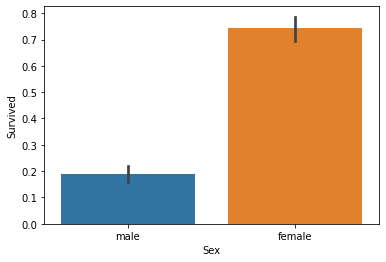

In [30]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

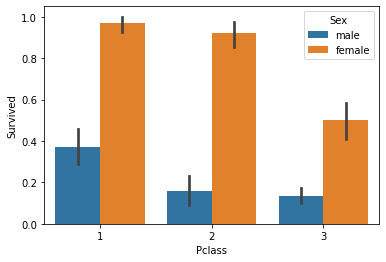

In [31]:
# 부(객실 등급)를 기준으로 한 생존 확률 + 성별 고려
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐

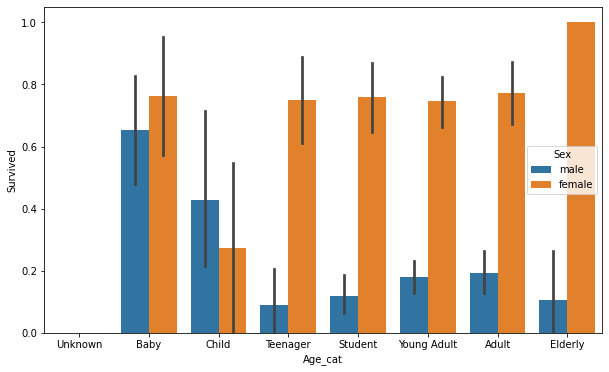

In [33]:
# Age에 따른 생존 확률 → 나이를 범위별로 분류해 카테고리 값 할당
def get_category(age):
    cat=''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

여자 Baby의 경우 비교적 생존 확률 높음    
여자 Child의 경우 다른 연령대에 비해 생존 확률 낮음    
여자 Elderly의 경우 매우 생존 확률 높음    

In [34]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


LabelEncoder을 이용해 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 -1)까지의 숫자 값으로 변환    
Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것 확인 가능

In [39]:
# 지금까지 피처를 가공한 내역 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만듦
# 데이터 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null 처리, 포매팅, 인코딩을 수행

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [40]:
# Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만듦
# Survived 속성 드롭해 피처 데이터 세트 만듦
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [42]:
# 결정 트리, 랜덤 포레스트, 로지싁 회귀를 이용해 타이타닉 생존자 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측.평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForesteClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForesteClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\jiddo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도:{1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도:{0:.4f}".format(mean_score))
    
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도:0.7823


평균 정확도는 약 78.23%

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도:{1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도:0.7430
교차 검증 1 정확도:0.7753
교차 검증 2 정확도:0.7921
교차 검증 3 정확도:0.7865
교차 검증 4 정확도:0.8427
평균 정확도:0.7879


cross_val_score()은 StratifiedKFold 이용하기 때문에 K폴드와 평균 정확도가 살짝 다름

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


최적화된 하이퍼 파라미터인 max_depth=3, min_samples_leaf=1, min_samples_split=2로 DecisionTreeClassifier 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됨    